<a href="https://colab.research.google.com/github/Miragecore/LiveStitching/blob/main/FrameGenerator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

큰 이미지를 설정한 후 설정된 roi를 기반으로 이미지를 랜덤 샘플링하기 위한 클래스

In [ ]:
import random

class FrameGenerator:
    '''
    The FrameGenerator has function & variables 
    to generate subimages from large source

    Args:
        img : large source image
        roih : subimage's ROI height
        roiw : subimage's ROI width
    '''
    def __init__(self, img, roih, roiw):
        self.source = img
        self.roih = roih
        self.roiw = roiw
        self.source_h, self.source_w = img.shape[:2]
        #h, w
        self.maxStride = [round(roih/3), round(roiw/3)]
       
        img_h, img_w = img.shape[:2]
        sx = random.randint(0, img_w-roiw)
        sy = random.randint(0, img_h-roih)
        self.img_h = img_h
        self.img_w = img_w

        self.frame = self.source[sy:sy+roih, sx:sx+roiw]
        self.sx = sx
        self.sy = sy

    #랜덤 포인트 생성
    def getNextPoint(self):
        sx = random.randint(self.sx - self.maxStride[0],\
                self.sx + self.maxStride[0])
        sy = random.randint(self.sy - self.maxStride[1],\
                self.sy + self.maxStride[1])
       
        if sx + self.roiw > self.img_w:
            sx = self.img_w - self.roiw
       
        if sx < 0:
            sx = 0
       
        if sy + self.roih > self.img_h:
            sy = self.img_h - self.roih
        
        if sy < 0:
            sy = 0

        return sx, sy

    #랜덤 포인트 생성후 source이미지에 ROI를 생성하여 리턴
    def generate(self):
        sx, sy = self.getNextPoint()

        self.frame = self.source[sy:sy+self.roih,\
                      sx:sx+self.roiw].copy()

        self.sx = sx
        self.sy = sy

        return self.frame

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
#스틸컷에 쓸 이미지 로딩을 위한 구글드라이브 마운트
import os
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

#드라이브안에서 프로젝트 드라이브로 이동
root_path = '/content/drive/MyDrive/SandBox/Stitch'

os.chdir(root_path);
!pwd

source = cv2.imread('staringNight.png')
frameGen = FrameGenerator(source, 300, 300)

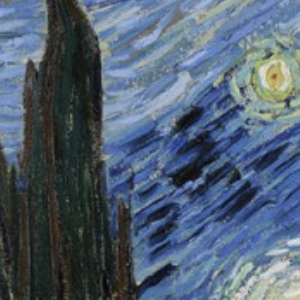

In [ ]:
cv2_imshow(frameGen.generate())